# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [46]:
df['temperature'].std(), df['temperature'].mean()

(0.7331831580389454, 98.24923076923078)

### 1. 
We can use the following 4 methods to check if a distribution is normal: 1) cursory visual inspection, 2) Q-Q plot,  3) standard deviation check, and 4) Shapiro-Wilk test.

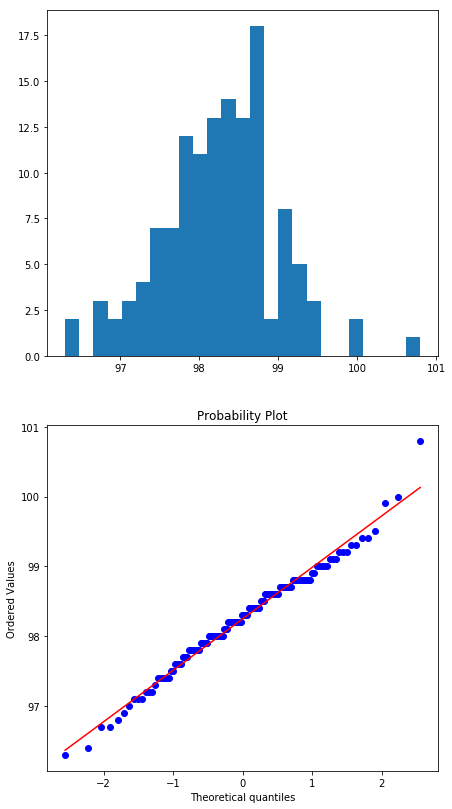

In [41]:
fig = plt.figure()
fig,axes = plt.subplots(2,1, figsize = (7,14))
plot = axes[0].hist(df['temperature'], bins = 25)
scipy.stats.probplot(df['temperature'], dist = "norm", plot = plt)
plt.show()

From first inspection, it does not appear that body temperature is normally distributed. There are not many temperatures above the mean vs. below the mean. However, the Q-Q plot suggests that the distribution is normal.

In [69]:
stdev = df['temperature'].std() 
tempMean = df['temperature'].mean()
samples = len(df['temperature'])

In [57]:
len(df[np.logical_and(df['temperature'] > tempMean - stdev, df['temperature'] < tempMean + stdev)])/len(df)

0.6923076923076923

In [58]:
len(df[np.logical_and(df['temperature'] > tempMean - 2*stdev, df['temperature'] < tempMean + 2*stdev)])/len(df)

0.9461538461538461

In [59]:
len(df[np.logical_and(df['temperature'] > tempMean - 3*stdev, df['temperature'] < tempMean + 3*stdev)])/len(df)

0.9923076923076923

The distribution of the temperatures based on the standard deviations seem to follow the rule for normal distributions (68, 95, 99.7).


In [42]:
stats.shapiro(df['temperature'])


(0.9865769743919373, 0.2331680953502655)

The results of the Shapiro-Wilk test suggests that the distribution is normal since the p-value (.233) is relatively high. Thus, we fail to reject the null hypothesis that the distribution is normally distributed.

### 2. 

A common benchmark for applying the central limit theorem is a sample size of 30. In this case, our sample size is 130 so the theorem should hold true. We can assume the observations and independent since measuing one person's internal temperature should not impact the measurement of another person's.

### 3. 

Since we are only interested in one population, we will use a 1 sample test. We will use the z-statistic since n > 30.


In [67]:
z = np.abs(tempMean - 98.6) / (stdev / np.sqrt(samples))
z

5.4548232923640789

In [82]:
p_value = 1 - (stats.norm.cdf(z) - stats.norm.cdf(-z))
p_value

4.9021570136531523e-08

Since the p-value is significant to a standard alpha of .05, we reject the null hypothesis that the mean temperature is 98.6.

In [94]:
t_p_value = 1 - (stats.t.cdf(z,samples-1) - stats.t.cdf(-z,samples-1))
t_p_value

2.4106320417605076e-07

The p-value using a t-distribution is slightly higher since a t-distributation has fatter tails than a normal distribution. It represents smaller values of n where we would be less sure of extreme values.

### 4.

If we consider temperatures too high and too low as abnormal (two-tailed) and an alpha level of .05, abnormal temperatures would be within 1.96 standard deviations of the mean.

In [97]:
(tempMean - 1.96*stdev, tempMean + 1.96*stdev)

(96.81219177947445, 99.68626975898711)

In [98]:
tempMean

98.24923076923078

### 5. 

In [104]:
maleMeanTemp = df[df['gender'] == 'M']['temperature'].mean()

In [107]:
femaleMeanTemp = df[df['gender'] == 'F']['temperature'].mean()

In [108]:
maleMeanTemp, femaleMeanTemp

(98.1046153846154, 98.39384615384613)

In [109]:
diffMean = abs(maleMeanTemp-femaleMeanTemp)

Null hypothesis is mean difference of the distributions of the differences is 0. The variance adds from each distribution as follows.

In [116]:
diffSD = np.sqrt((df[df['gender'] == 'M']['temperature'].std()**2)/len(df[df['gender'] == 'M']) + (df[df['gender'] == 'F']['temperature'].std()**2)/len(df[df['gender'] == 'F']))
diffSD

0.12655395041982642

Using an alpha of .05 and two-tailed test,

In [119]:
diffZ = diffMean / diffSD
diffZ

2.2854345381652741

For an alpha of .05, we reject the null hypothesis because the difference between male and female temperatures is 2.285 standard deviations away from the mean, which is greater than the critical level of 1.96. 